## Helmholtz B-field simulation

In [11]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, get_grid_mag_and_nonuniformity, make_xy_grid
import magpylib as magpy
from magpylib.magnet import CylinderSegment
import matplotlib.pyplot as plt

In [9]:
def get_field_on_axes(magnets, sensor_bounds, is_logscale=True):
    x_sensor_bounds, y_sensor_bounds, z_sensor_bounds = sensor_bounds
    # define sensor axis in 3d space
    sens_res = 5000
    x_senpos = np.linspace((x_sensor_bounds[0], 0, 0), (x_sensor_bounds[1], 0, 0), sens_res)
    # initialize sensor
    x_sen = magpy.Sensor(position=x_senpos)

    y_senpos = np.linspace((0, y_sensor_bounds[0], 0 ), (0, y_sensor_bounds[1], 0), sens_res)
    y_sen = magpy.Sensor(position=y_senpos)
    
    z_senpos = np.linspace((0, 0, z_sensor_bounds[0]), (0, 0, z_sensor_bounds[1]), sens_res)
    z_sen = magpy.Sensor(position=z_senpos)
    
    # read from transverse and axial sensors
    # convert from returned mT readings to Gauss
    mT_to_G = 10
    x_Bz = x_sen.getB(magnets).T[2]
    y_Bz = y_sen.getB(magnets).T[2]
    z_Bz = z_sen.getB(magnets).T[2]
    xb, yb, zb = [x_sen.getB(magnets), y_sen.getB(magnets), z_sen.getB(magnets)]
    print(xb)
    xbn = np.linalg.norm(xb, axis=1) * mT_to_G
    ybn = np.linalg.norm(yb, axis=1) * mT_to_G
    zbn = np.linalg.norm(zb, axis=1) * mT_to_G

    # convert from returned mT readings to Gauss
    mT_to_G = 10
    x_Gz = x_Bz * mT_to_G
    y_Gz = y_Bz * mT_to_G
    z_Gz = z_Bz * mT_to_G
    
    # set plotting configurations
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    # plt.rcParams.update({'font.size': 14})
    
    fig_width = 15
    fig, axs = plt.subplots(2, 3, figsize=(fig_width, 2/3*fig_width))
    axs = axs.flat
    
    # 1. plot the B_z component on each of the three sensor axes
    axs[0].set_ylabel("Gauss")
    axs[0].set_xlabel("mm")
    axs[0].plot(x_senpos[:, 0], xbn)
    axs[0].set_title("B-field variation on x-axis")
    axs[0].grid(color='.9', which='major', axis='both', linestyle='-')

    # axs[1].set_ylabel("Gauss")
    axs[1].set_xlabel("mm")
    axs[1].plot(y_senpos[:, 1], ybn)
    axs[1].set_title("B-field variation on y-axis")
    axs[1].grid(color='.9', which='major', axis='both', linestyle='-')

    # axs[2].set_ylabel("Gauss")
    axs[2].set_xlabel("mm")
    axs[2].plot(z_senpos[:, 2], zbn)
    axs[2].set_title("B-field variation on z-axis")
    axs[2].grid(color='.9', which='major', axis='both', linestyle='-')
    
    # 2. get nonuniformity along each of the 3 axes
    x_Gnon, x_min_nonuniformity, x_max_nonuniformity, x_av_nonuniformity = get_nonuniformity(xbn, "x", sens_res)
    y_Gnon, y_min_nonuniformity, y_max_nonuniformity, y_av_nonuniformity = get_nonuniformity(ybn, "y", sens_res)
    z_Gnon, z_min_nonuniformity, z_max_nonuniformity, z_av_nonuniformity = get_nonuniformity(zbn, "z", sens_res)
    
    # 3. set nonuniformity plots to logscale
    if (is_logscale):
        axs[3].set_yscale("log")
        axs[4].set_yscale("log")
        axs[5].set_yscale("log")
    
    
    # 4. plot nonuniformity
    axs[3].plot(x_senpos[:, 0], x_Gnon)
    axs[3].grid(color='.9', which='major', axis='both', linestyle='-')
    axs[3].set_ylim(x_min_nonuniformity - 1e-7, x_max_nonuniformity + 1e-7)
    axs[3].set_title('Nonuniformity profile on x-axis')
    axs[3].set_xlabel("mm")
    
    axs[4].plot(y_senpos[:, 1], y_Gnon)
    axs[4].grid(color='.9', which='major', axis='both', linestyle='-')
    axs[4].set_ylim(y_min_nonuniformity - 1e-7, y_max_nonuniformity + 1e-7)
    axs[4].set_title('Nonuniformity profile on y-axis')
    axs[4].set_xlabel("mm")
    
    axs[5].plot(z_senpos[:, 2], z_Gnon)
    axs[5].grid(color='.9', which='major', axis='both', linestyle='-')
    axs[5].set_ylim(z_min_nonuniformity - 1e-7, z_max_nonuniformity + 1e-7)
    axs[5].set_title('Nonuniformity profile on z-axis')
    axs[5].set_xlabel("mm")

    plt.tight_layout()
    plt.savefig('figs/helmholtznonunprofiles.png', dpi=1000)

In [13]:
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
Gmag, Gnon, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_mag_and_nonuniformity(magnets, grid, grid_res)
print(av_nonuniformity)

3.3599884172387e-06


[[0.         0.         0.99999468]
 [0.         0.         0.99999468]
 [0.         0.         0.99999469]
 ...
 [0.         0.         0.99999469]
 [0.         0.         0.99999468]
 [0.         0.         0.99999468]]
On x-axis:
Maximum B-field: 10.0 G
Central B-field: 10.0 G
Min nonuniformity: 0.0
Max nonuniformity:5.188699863619571e-06


On y-axis:
Maximum B-field: 10.0 G
Central B-field: 10.0 G
Min nonuniformity: 0.0
Max nonuniformity:5.188699863619571e-06


On z-axis:
Maximum B-field: 10.0 G
Central B-field: 10.0 G
Min nonuniformity: 0.0
Max nonuniformity:1.3740727812301335e-05




/var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_10879/1108266097.py:76: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.

/var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_10879/1108266097.py:82: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.

/var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_10879/1108266097.py:88: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



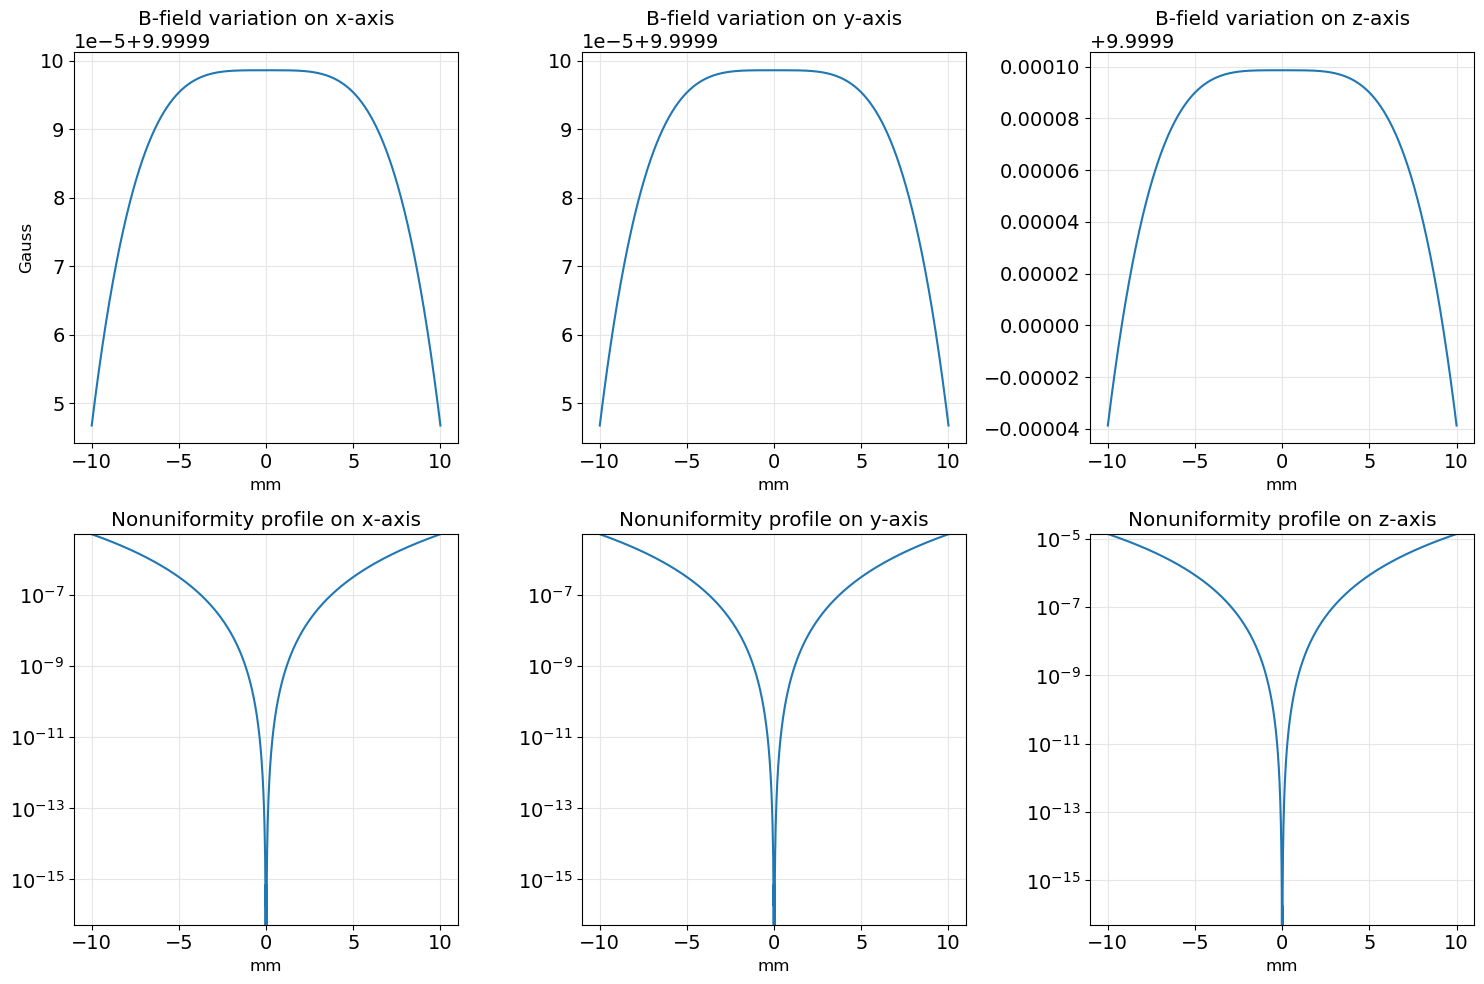

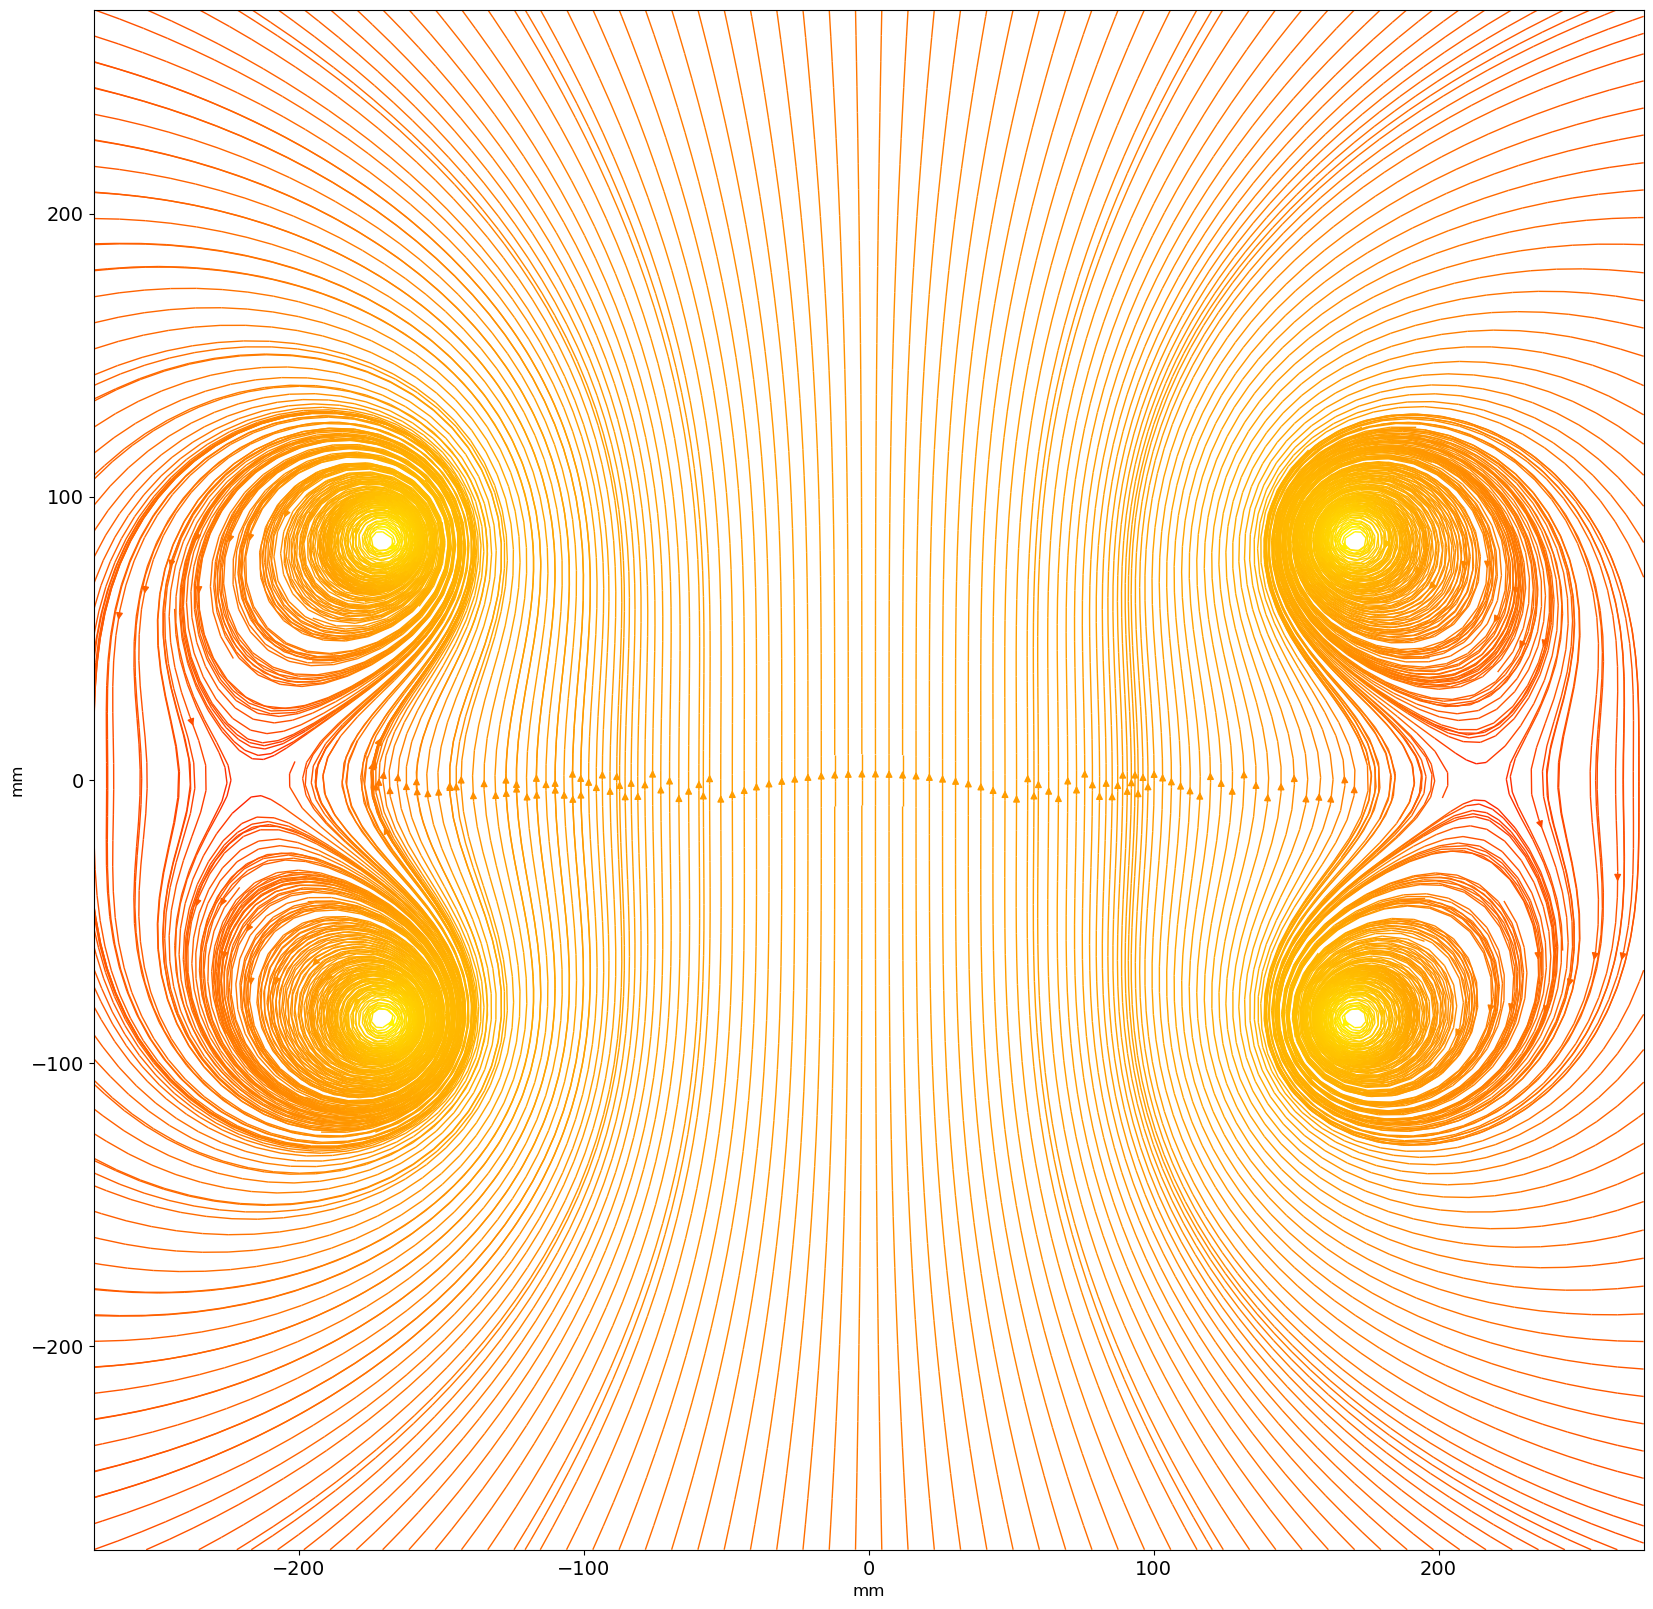

In [10]:
magnets = magpy.Collection()
d = 340
r = d/2
a = r/2
# i = 94.53 # for 5G
i = 189.0619 #for 10G
winding1 = magpy.current.Loop(
    current=i,
    diameter=d,
    position=(0,0,a),
)
winding2 = magpy.current.Loop(
    current=i,
    diameter=d,
    position=(0,0,-a),
)
magnets.add(winding1).add(winding2)


sens_len = 10
get_field_on_axes(magnets, [[-sens_len, sens_len], [-sens_len, sens_len], [-sens_len, sens_len]], True)

b_len = d*0.8
x_bounds = [-b_len, b_len]
z_bounds = [-b_len, b_len]
make_flux_stream(magnets, x_bounds, z_bounds, [])

Experiment to match with figures obtained in https://amp.iaamonline.org/article_16269_aacd71f0c05236d28cc0782cad50b807.pdf

On x-axis:
Maximum B-field: 2000.967 G
Central B-field: 2000.967 G
Min nonuniformity: 0.0
Max nonuniformity:8.56798490042738e-06


On y-axis:
Maximum B-field: 2000.967 G
Central B-field: 2000.967 G
Min nonuniformity: 0.0
Max nonuniformity:8.56798490042738e-06


On z-axis:
Maximum B-field: 2000.967 G
Central B-field: 2000.967 G
Min nonuniformity: 0.0
Max nonuniformity:2.2644951230806856e-05


Uniform region width with threshold 1e-06: x = 2.339 cm, y = 2.339 cm, z = 1.832 cm


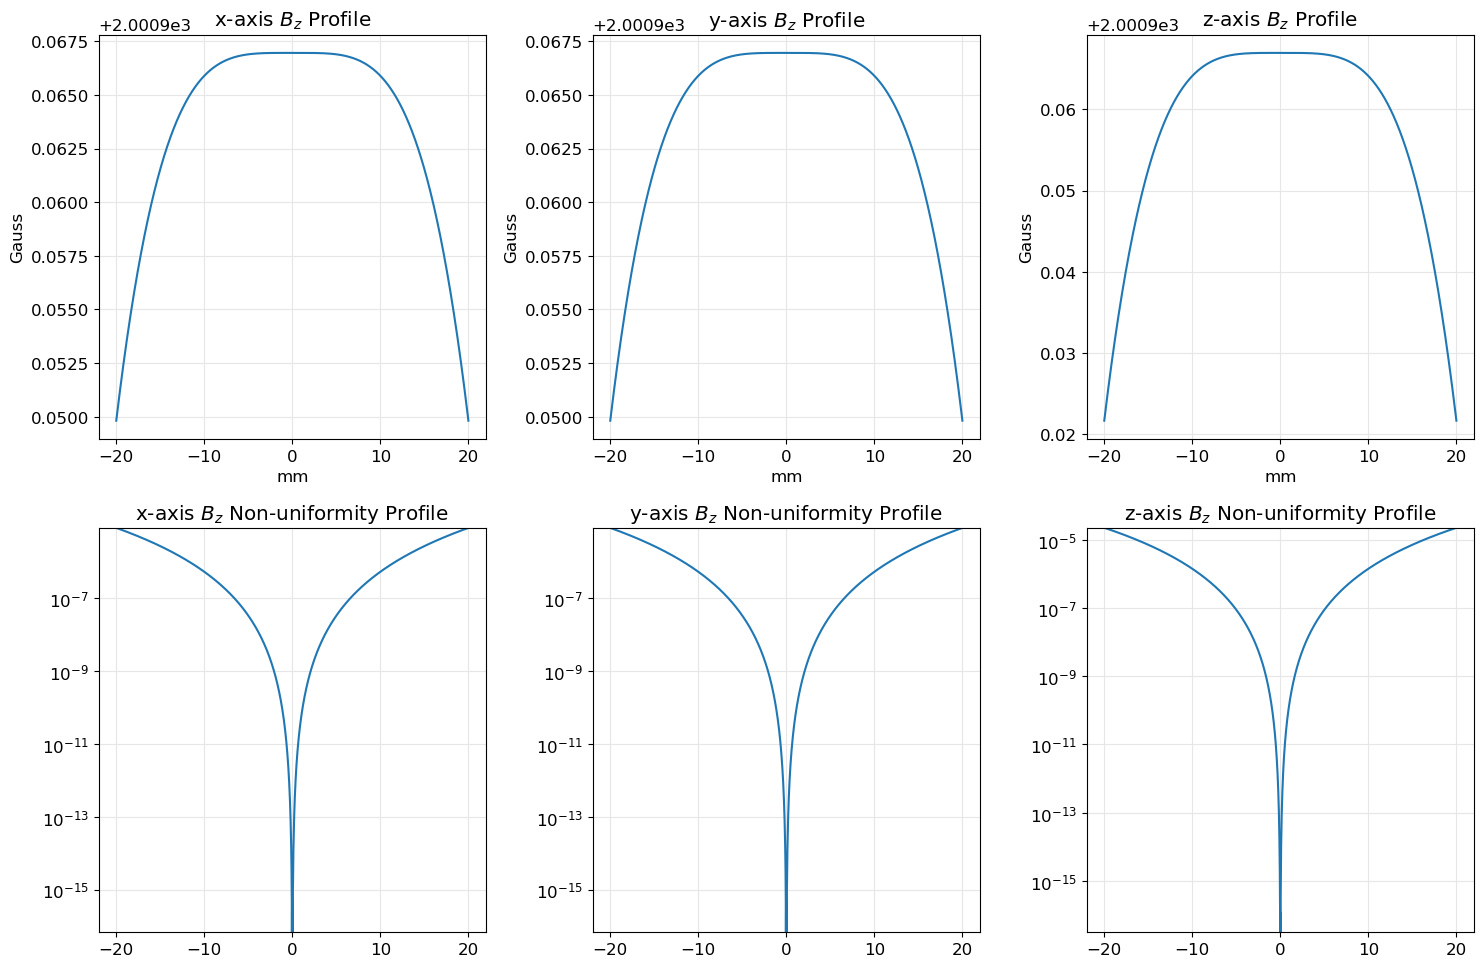

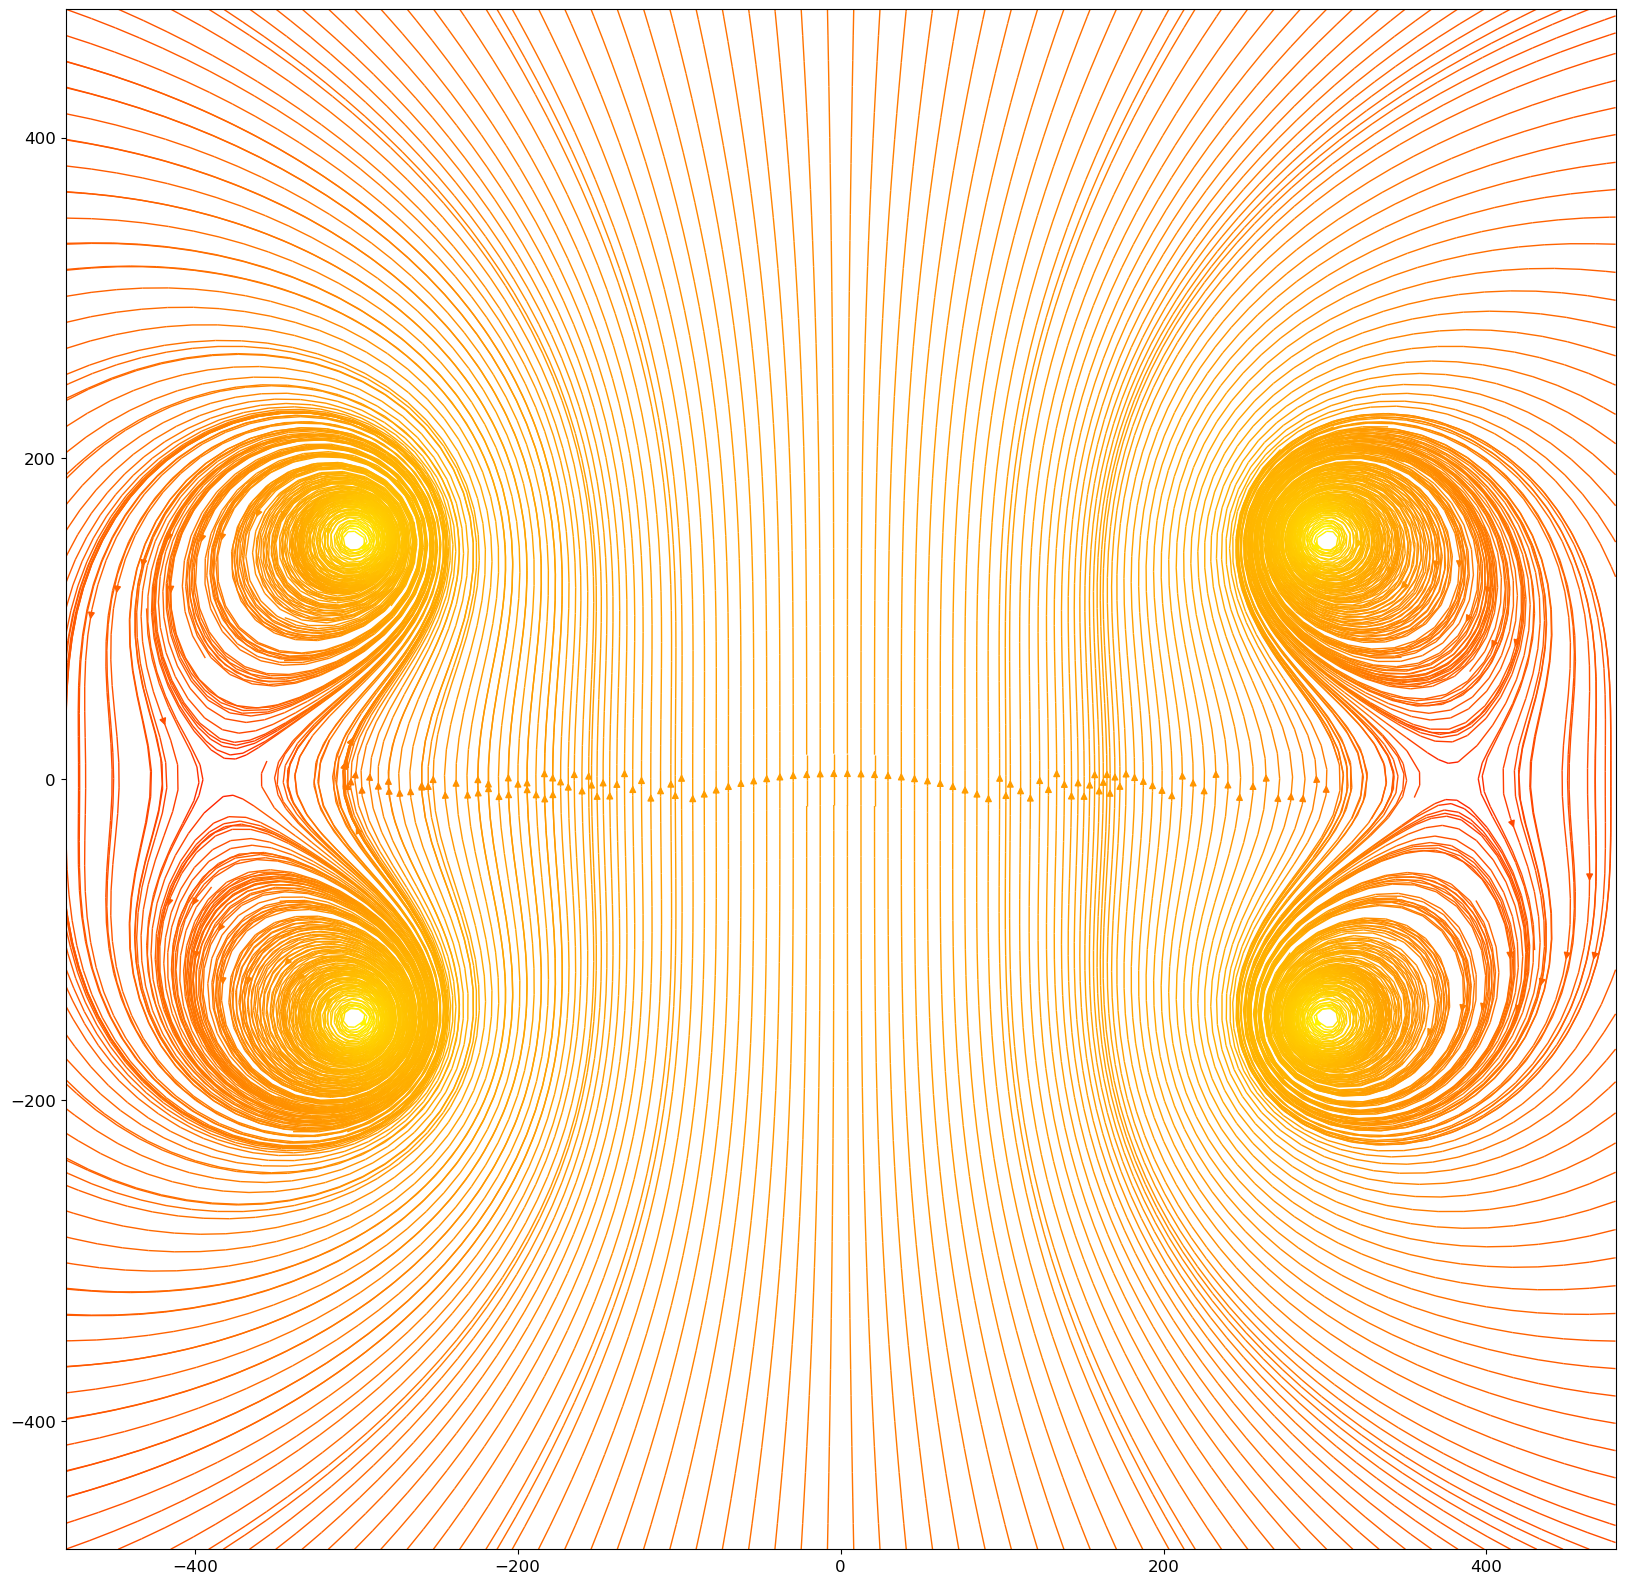

In [19]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream
import magpylib as magpy
from magpylib.magnet import CylinderSegment

magnets = magpy.Collection()
d = 600
r = d/2
a = r/2
i = 10*6676
winding1 = magpy.current.Loop(
    current=i,
    diameter=d,
    position=(0,0,a),
)
winding2 = magpy.current.Loop(
    current=i,
    diameter=d,
    position=(0,0,-a),
)
magnets.add(winding1).add(winding2)


sens_len = 20
get_field_on_axes(magnets, [[-sens_len, sens_len], [-sens_len, sens_len], [-sens_len, sens_len]], True)

b_len = d*0.8
x_bounds = [-b_len, b_len]
z_bounds = [-b_len, b_len]
make_flux_stream(magnets, x_bounds, z_bounds, [])